In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable,"-m","pip","install",(package)])

def freeze_requirements():
    try:
        with open('requirements.txt', 'w') as f:
            subprocess.check_call([sys.executable, "-m", "pip", "freeze"], stdout=f)
    except subprocess.CalledProcessError as e:
        print(f"Failed to freeze requirements: {e}")

In [2]:
packages = ["numpy","pandas","matplotlib","seaborn","scikit-learn"]

for pkg in packages:
    install(pkg)

freeze_requirements()

In [3]:
import pandas as pd
import numpy as np
import os

PROJECT_ROOT_DIR = "includes/"
FOLDER_NAME = "CarPriceDataset_Final"
import_csv_through_url = 'https://raw.githubusercontent.com/Sudipta1975git/Car_Price_dataset/main/CarPriceDataset_Final.csv'
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR+"datasets",FOLDER_NAME)
os.makedirs(HOUSING_PATH, exist_ok=True)

car_price_url = PROJECT_ROOT_DIR+"datasets"+FOLDER_NAME+""
# df_url = pd.read_csv(import_csv_through_url)

# File path to save the downloaded CSV
local_csv_path = os.path.join(HOUSING_PATH, "CarPriceDataset_Final.csv")
df = pd.read_csv(import_csv_through_url)
df.to_csv(local_csv_path, index=False)

In [4]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
# lifesat.head()


In [5]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [6]:
# X = pd.DataFrame([1,2,3,4,5,6])

# y = pd.DataFrame([11,12,13,14,15,16])

def mean(arr):
    length = len(arr)
    # print(length)
    sum = 0
    for a in range(0,length):
        sum = sum + arr[a]
    mean_val =  sum/length

    return mean_val

def variance(x):

    length = len(x)
    mean_value = mean(x)
    variance_sum = 0
    for a in range(0,length):
        variance_sum = variance_sum +(((x[a]) - mean_value)**2)
    variance_total =variance_sum/length
    return variance_total

def covariance(x, y):
    length = len(x)
    mean_x = mean(x)
    mean_y = mean(y)
    cov_sum = 0
    for i in range(0, length):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)
    return cov_sum / length

def slope(x,y):
    return covariance(x,y)/variance(x)

def intercept(x,y,slope):
    return mean(y) - slope * mean(x)

def predict(x, slope, intercept):

    return slope * x + intercept

slope_value = slope(X,y)
intercept_value = intercept(X,y,slope_value)

print(f"Slope: {slope_value}")
print(f"Intercept: {intercept_value}")

new_val = 37_655.2

predictions = predict(new_val,slope_value,intercept_value)
print(f"Predictions: {predictions}")

Slope: [6.77889969e-05]
Intercept: [3.74904943]
Predictions: [6.30165767]


In [7]:
data_root

'https://github.com/ageron/data/raw/main/'

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

new_val = np.array([[new_val]])
print(model.predict(new_val))


[[6.30165767]]


# Hands-On Machine Learning [Chapter: 2]

<h5>Housing Complex Datasheet</h5>

In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "includes/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


<h3>Get the Data</h3>
<h5>Download the Data</h5>

In [10]:
import os
import tarfile
import urllib.request
from pathlib import Path
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR+"datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return pd.read_csv(Path(PROJECT_ROOT_DIR+"/datasets/housing/housing.csv"))

housing = fetch_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


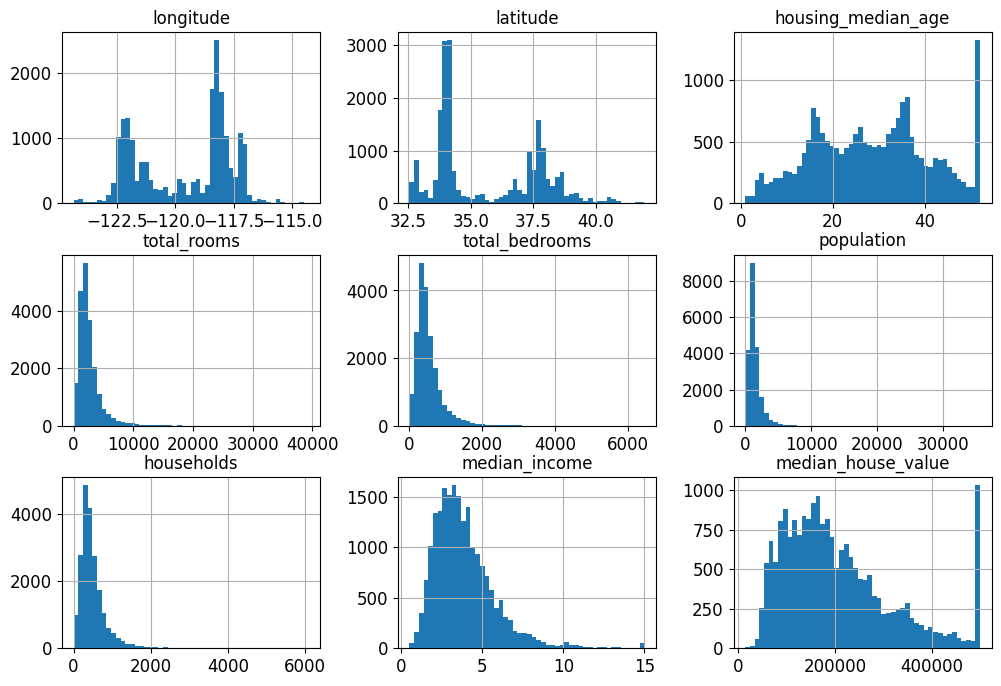

In [15]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(12,8))
plt.show()

In [16]:
import numpy as np
import pandas as pd

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

data = pd.DataFrame({2, 4, 6, 8, 10, 12, 14, 16,18,20,22,24})

# Use a valid test ratio (e.g., 0.4 = 40%)
training_set, testing_set = split_train_test(data, 0.2)

print("Training set:")
print(training_set.values.flatten().tolist())
print("Testing set:")
print(testing_set.values.flatten().tolist())





[10  9  0  8  5  2  1 11  4  7  3  6]
Training set:
[2, 18, 12, 6, 4, 24, 10, 16, 8, 14]
Testing set:
[22, 20]


In [17]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id: is_id_in_test_set(id, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]



In [18]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

print("Training length: ",len(train_set))
print("Test length: ",len(test_set))

Training length:  16512
Test length:  4128


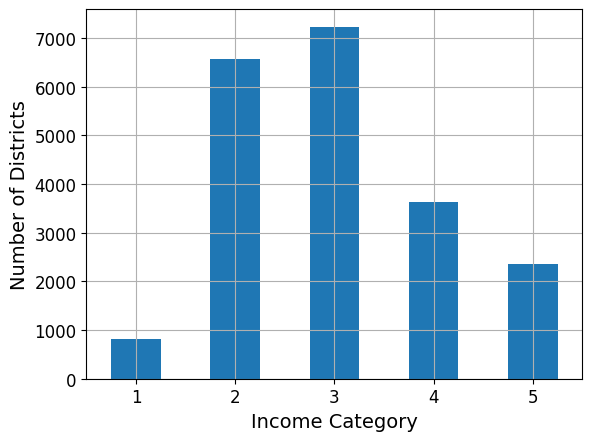

In [19]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])


housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [20]:
housing['income_cat'].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    strat_splits.append((strat_train_set,strat_test_set))
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify = housing['income_cat'],random_state=42)

In [22]:
strat_test_set['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [23]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)



,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [24]:
# for set_ in (strat_test_set,strat_train_set):
#   set_.drop('income_cat',axis=1,inplace=True)

# Create Data Visualization

In [25]:
housing = strat_train_set.copy()

<h3>Visualizing Geographical Data</h3>

Saving figure Scatter plot for Californaia Housing(Good)


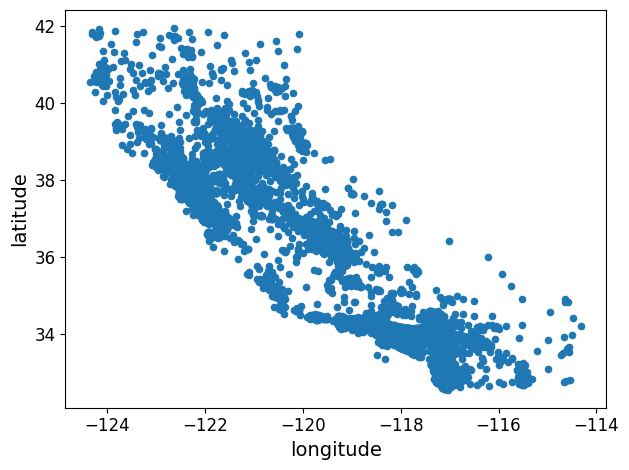

In [26]:
# A not so good one

housing.plot(kind="scatter",x="longitude",y="latitude")
save_fig("Scatter plot for Californaia Housing(Good)")
plt.show()

Saving figure Scatter plot for Californaia Housing(Better)


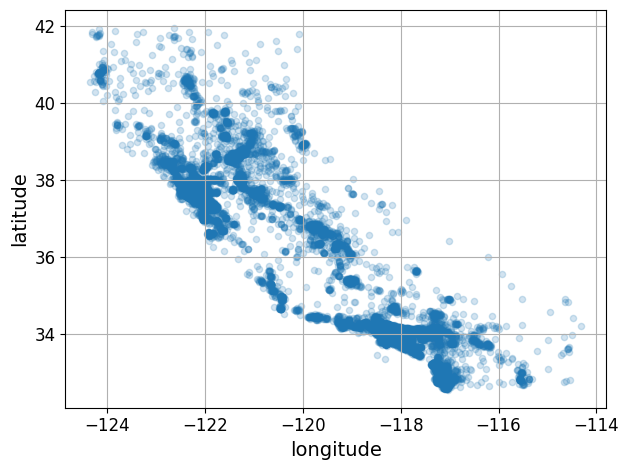

In [27]:
# A better one

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
save_fig("Scatter plot for Californaia Housing(Better)")
plt.show()

In [28]:
housing.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

Saving figure Scatter plot for Californaia Housing(Best)


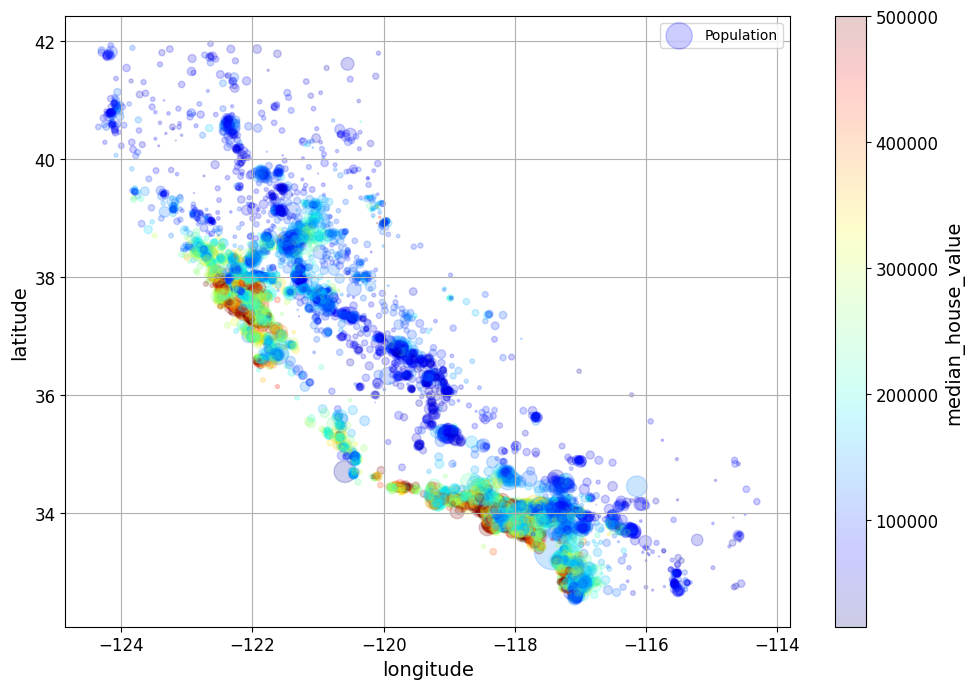

In [29]:
# A best one

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
             alpha=0.2,s=housing["population"]/50,
             label="Population",
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10,7)
             )
save_fig("Scatter plot for Californaia Housing(Best)")
plt.show()

In [30]:
corr_matrix = housing.corr(numeric_only=True)

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


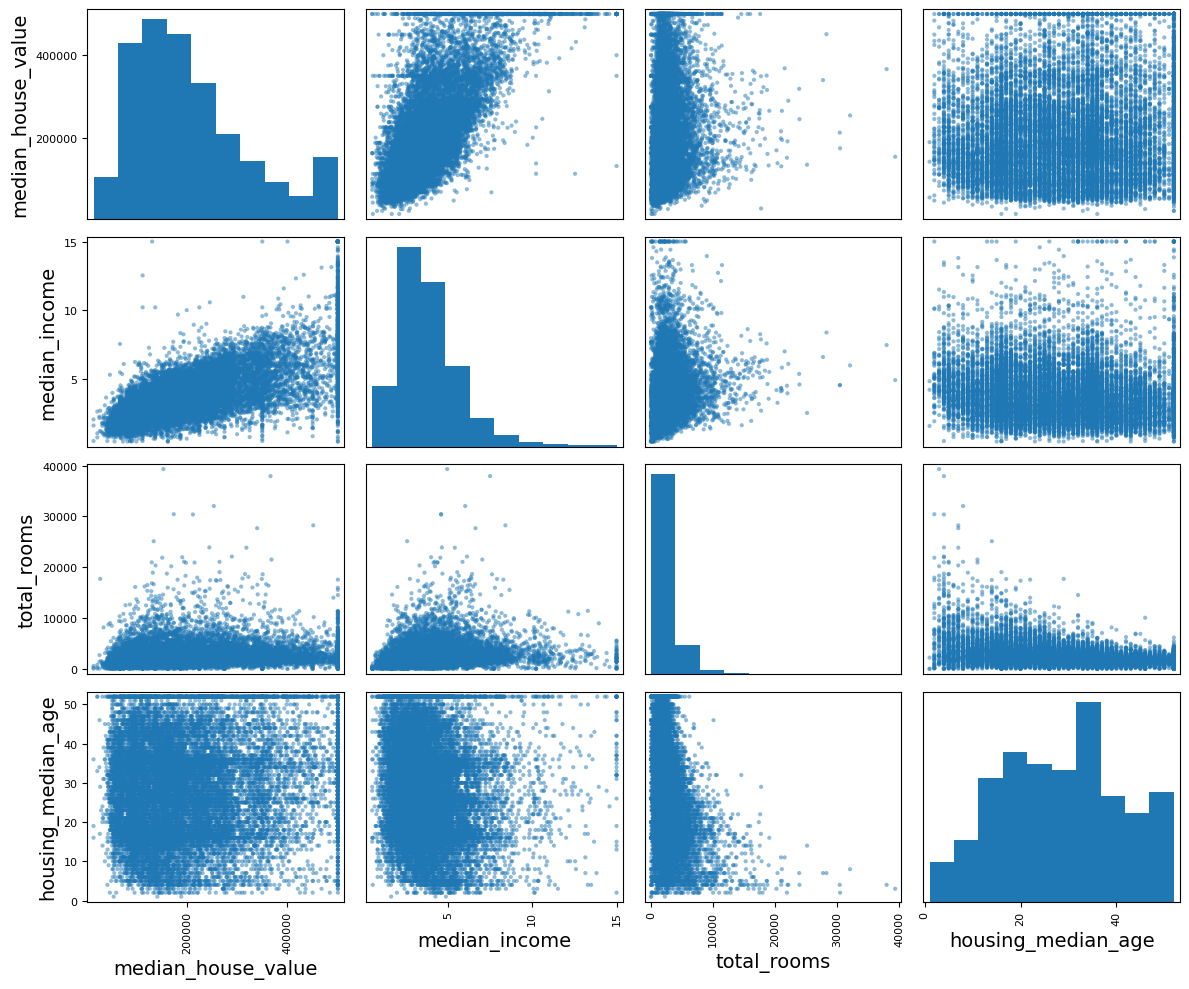

In [32]:


from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 10))
save_fig("scatter_matrix_plot")  # extra code
plt.show()



In [33]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

# Prepearing the data for Machine Learning    

In [34]:
housing = strat_train_set.drop("median_house_value",axis=1)      #Predictors
housing_labels =  strat_train_set["median_house_value"].copy()   #Target

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

<h3>Time for Imputation</h3>

In [35]:
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [39]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [40]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
X = imputer.transform(housing_num)

In [44]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [45]:
# print(type(X)) 

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

<h3>Handling Text and Categorical Attributes</h3>

In [53]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [54]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
housing_cat_encoded = ordinalEncoder.fit_transform(housing_cat) 